### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Import dataset

In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Split train set

In [6]:
X = train.drop("label", axis = 1)
y = train["label"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Visualize some data

In [8]:
X_train.iloc[10].values.reshape(28, 28).shape

(28, 28)

Label:  3


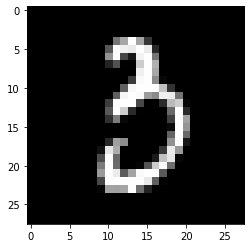

In [9]:
index = 150
print("Label: ", train["label"].iloc[index])
plt.imshow(train.drop("label", axis = 1).iloc[index].values.reshape(28, 28), cmap = "gray")
plt.show()

In [10]:
X_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


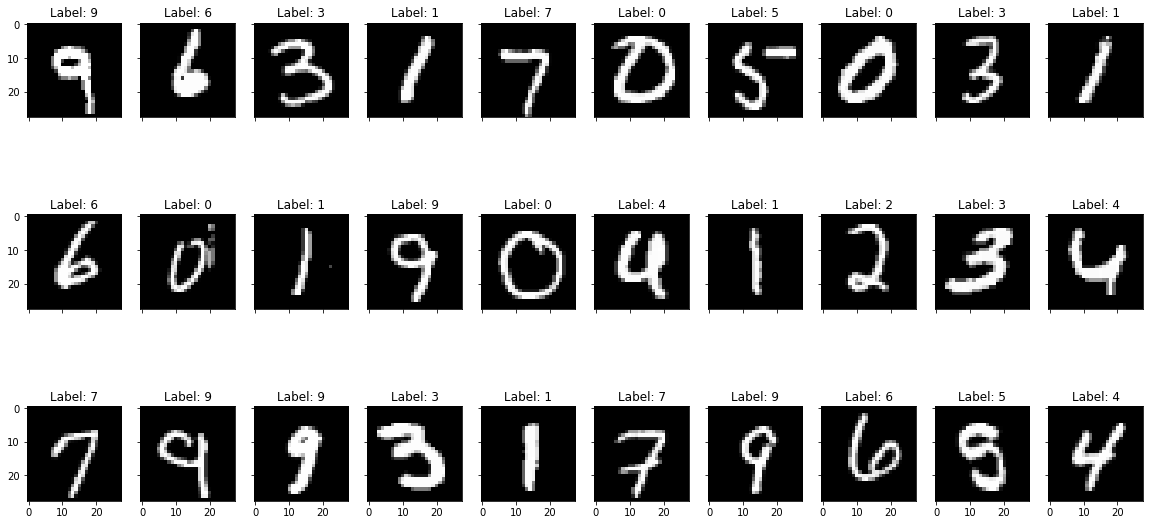

In [11]:
fig, axs = plt.subplots(3, 10, figsize = (20, 10))
idx = 15
for i in range(0, 3):
    for j in range(0, 10):
        axs[i, j].imshow(X_train.iloc[idx].values.reshape(28, 28), cmap = "gray")
        axs[i, j].set_title("Label: " + str(y_train.iloc[idx]))
        idx += 1

for ax in axs.flat:
    ax.label_outer()

### Random Forest

In [14]:
rfc = RandomForestClassifier()

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
predictions = rfc.predict(X_test)

In [18]:
accuracy_score(y_test, predictions)

0.9646464646464646

In [19]:
confusion_matrix(y_test, predictions)

array([[1316,    0,    0,    0,    1,    0,    2,    0,   10,    0],
       [   0, 1541,    7,    7,    3,    1,    2,    2,    4,    2],
       [   5,    4, 1323,    3,    9,    0,    7,   13,   14,    1],
       [   2,    5,   18, 1338,    1,   13,    4,   10,   15,   10],
       [   2,    1,    2,    0, 1288,    1,    6,    2,    1,   16],
       [   6,    1,    0,   16,    4, 1185,    7,    0,    7,    4],
       [   6,    2,    2,    0,    0,   12, 1345,    0,    3,    0],
       [   1,    6,   12,    2,   11,    0,    0, 1396,    2,   18],
       [   5,    5,   10,   18,    7,   12,    7,    3, 1292,    9],
       [   6,    5,    2,   21,   24,    4,    2,   12,   10, 1346]],
      dtype=int64)

### Predict test set

In [ ]:
test.head()

In [20]:
predictions_test = rfc.predict(test)

In [ ]:
predictions_test[0:]

In [ ]:
submission = pd.DataFrame(data = {
    "ImageId": [x for x in range(1, len(predictions_test) + 1)],
    "Label": predictions_test
})

In [ ]:
submission.to_csv("submission", index=False)

In [21]:
def predictImageArray(array):
    plt.imshow(array.values.reshape(28, 28), cmap = "gray")
    data_test = pd.DataFrame(data = array.values.reshape(1, 784), columns = array.index)
    print("Prediction:", rfc.predict(data_test)[0])

In [ ]:
pd.DataFrame(data = test.iloc[1].values.reshape(1, 784), columns = test.iloc[1].index)

Prediction: 2


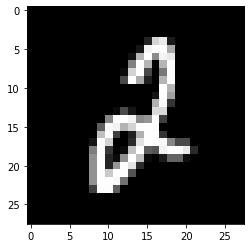

In [25]:
predictImageArray(test.iloc[15050])